<a href="https://colab.research.google.com/github/Francilandio07/Trabalho-de-ML-Disciplina-IoT-/blob/main/Parte%202/Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 2 do primeiro trabalho da disciplina Jogos Dinâmicos

## Escolha de conjunto de dados do Scikit-Learn (Iris dataset) e uso de 4 classificadores para treino e teste, comparando seus desempenhos.

## 1. Importação de bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 2. Visualizando a distribuição das amostras da base

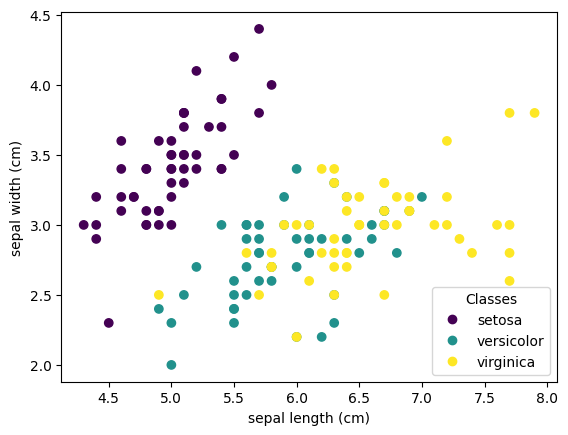

In [ ]:
iris = load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

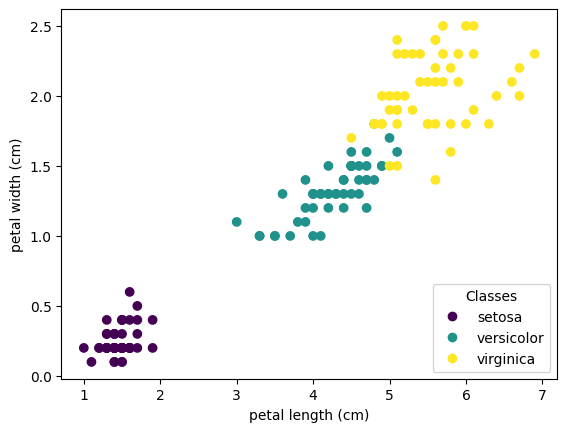

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

## 3. Instanciando os classificadores e dividindo a base em amostras de treino e teste

In [ ]:
# Instanciando os classificadores
clf_SVM = SVC(gamma=0.001)
clf_KNN = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', algorithm = 'kd_tree', leaf_size = 15, p = 2, metric = 'minkowski', metric_params = None, n_jobs = None)
clf_DT = DecisionTreeClassifier(criterion = 'log_loss', splitter = 'random', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 'log2', random_state = 42)
clf_GNB = GaussianNB()

# Dividindo os dados em 70% de treino e 30% de teste, com estratificação
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Verificando a proporção de classes no conjunto de treinamento
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Classe {cls}: {count} amostras")

# Treinando os classificadores
clf_SVM.fit(X_train, y_train)
clf_KNN.fit(X_train, y_train)
clf_DT.fit(X_train, y_train)
clf_GNB.fit(X_train, y_train)


# Fazendo predições com os classificadores sobre os dados de teste
predicted = clf_SVM.predict(X_test)
predicted_KNN = clf_KNN.predict(X_test)
predicted_DT = clf_DT.predict(X_test)
predicted_GNB = clf_GNB.predict(X_test)

Classe 0: 35 amostras
Classe 1: 35 amostras
Classe 2: 35 amostras


## 4. Visualizando as principais métricas de cada modelo

In [ ]:
print(
    f"Classification report for classifier {clf_SVM}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45




In [ ]:
print(
    f"Classification report for classifier {clf_KNN}:\n"
    f"{metrics.classification_report(y_test, predicted_KNN)}\n"
)

Classification report for classifier KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45




In [ ]:
print(
    f"Classification report for classifier {clf_DT}:\n"
    f"{metrics.classification_report(y_test, predicted_DT)}\n"
)

Classification report for classifier DecisionTreeClassifier(criterion='log_loss', max_features='log2',
                       random_state=42, splitter='random'):
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.93      0.90        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45




In [ ]:
print(
    f"Classification report for classifier {clf_GNB}:\n"
    f"{metrics.classification_report(y_test, predicted_GNB)}\n"
)

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45




In [ ]:
accuracy_SVM = metrics.accuracy_score(y_test, predicted)
accuracy_KNN = metrics.accuracy_score(y_test, predicted_KNN)
accuracy_DT = metrics.accuracy_score(y_test, predicted_DT)
accuracy_GNB = metrics.accuracy_score(y_test, predicted_GNB)

print(f'Acurácia SVM = {accuracy_SVM}\nAcurácia KNN = {accuracy_KNN}\nAcurácia DT = {accuracy_DT}\nAcurácia GNB = {accuracy_GNB}')

Acurácia SVM = 0.9111111111111111
Acurácia KNN = 0.9555555555555556
Acurácia DT = 0.9333333333333333
Acurácia GNB = 0.9111111111111111


## 5. Plotando matrizes de confusão de cada modelo

Confusion matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


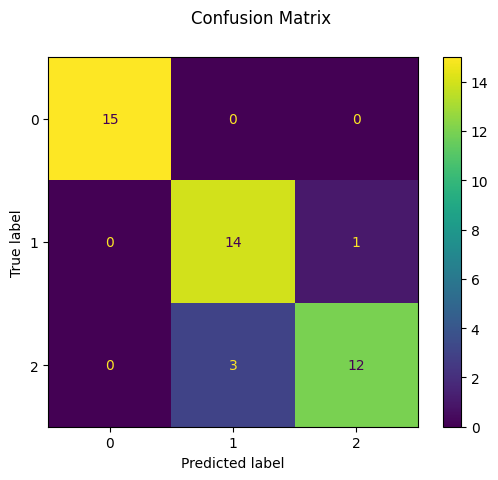

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


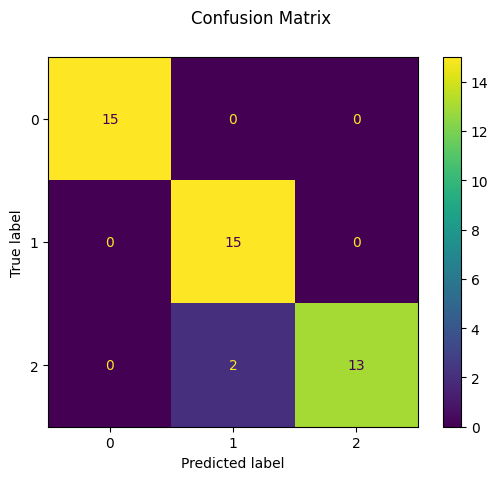

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_KNN)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[14  1  0]
 [ 0 14  1]
 [ 0  1 14]]


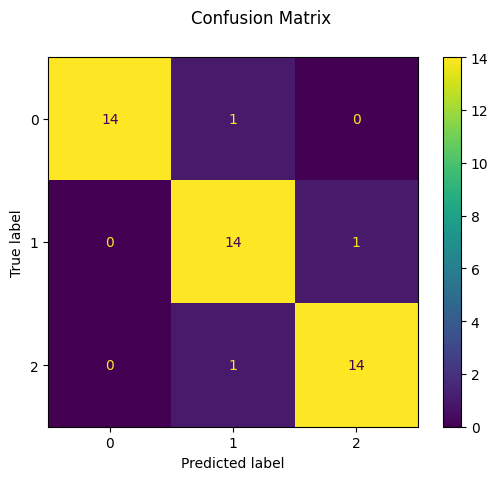

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_DT)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


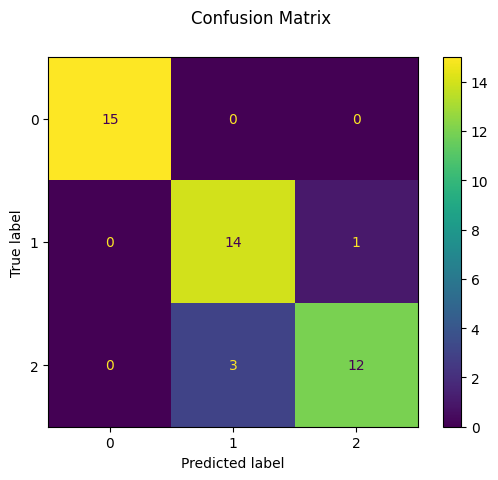

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_GNB)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## 6. Gerando gráficos e tabelas que permitem a comparação dos modelos

In [ ]:
# Calculando métricas
accuracy_knn = metrics.accuracy_score(y_test, predicted_KNN)
precision_knn = metrics.precision_score(y_test, predicted_KNN, average='weighted')
recall_knn = metrics.recall_score(y_test, predicted_KNN, average='weighted')

accuracy_dt = metrics.accuracy_score(y_test, predicted_DT)
precision_dt = metrics.precision_score(y_test, predicted_DT, average='weighted')
recall_dt = metrics.recall_score(y_test, predicted_DT, average='weighted')

accuracy_svm = metrics.accuracy_score(y_test, predicted)
precision_svm = metrics.precision_score(y_test, predicted, average='weighted')
recall_svm = metrics.recall_score(y_test, predicted, average='weighted')

accuracy_gnb = metrics.accuracy_score(y_test, predicted_GNB)
precision_gnb = metrics.precision_score(y_test, predicted_GNB, average='weighted')
recall_gnb = metrics.recall_score(y_test, predicted_GNB, average='weighted')


In [ ]:
# Criando um dicionário com as métricas
metrics_dict = {
    'Classificador': ['KNN', 'Decision Trees', 'SVM', 'GNB'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_svm, accuracy_gnb],
    'Precision': [precision_knn, precision_dt, precision_svm, precision_gnb],
    'Recall': [recall_knn, recall_dt, recall_svm, recall_gnb]
}

# Criando o DataFrame
df_metrics = pd.DataFrame(metrics_dict)

# Exibindo o DataFrame
print(df_metrics)


    Classificador  Accuracy  Precision    Recall
0             KNN  0.955556   0.960784  0.955556
1  Decision Trees  0.933333   0.936111  0.933333
2             SVM  0.911111   0.915535  0.911111
3             GNB  0.911111   0.915535  0.911111


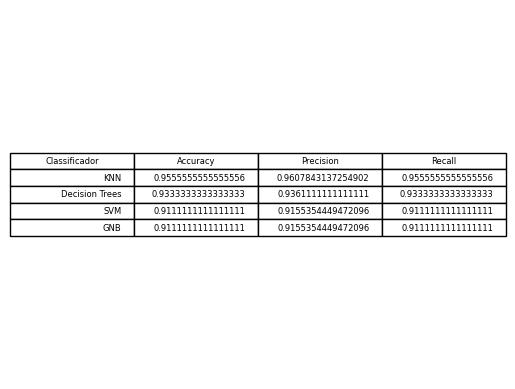

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')  # Oculta os eixos x e y
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, loc='center')

# Salva a imagem como um arquivo PNG
plt.savefig('meu_dataframe.png')

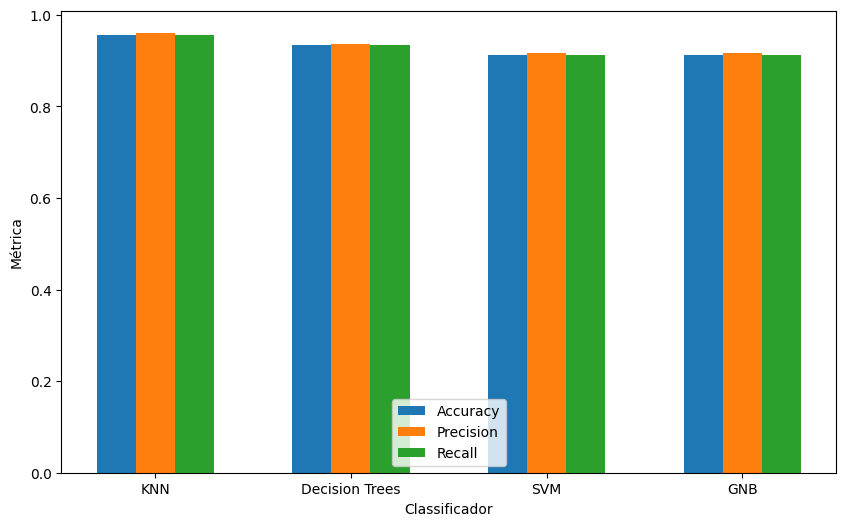

Imagem salva como 'metrics_plot.png'


In [ ]:
# Criando um gráfico de barras para visualizar as métricas
plt.figure(figsize=(10, 6))

# Definindo as posições das barras no eixo x
x = range(len(df_metrics))

# Plotando as barras para cada métrica
plt.bar(x, df_metrics['Accuracy'], width=0.2, label='Accuracy', align='center')
plt.bar([i + 0.2 for i in x], df_metrics['Precision'], width=0.2, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], df_metrics['Recall'], width=0.2, label='Recall', align='center')

# Configurando o eixo x
plt.xticks([i + 0.2 for i in x], df_metrics['Classificador'])
plt.xlabel('Classificador')
plt.ylabel('Métrica')

# Adicionando legendas
plt.legend()

# Salvando a figura em um arquivo
plt.savefig('metrics_plot.png')

# Exibindo o gráfico (opcional)
plt.show()

print("Imagem salva como 'metrics_plot.png'")
